<a href="https://colab.research.google.com/github/AkhileshMauryaa/Data_Analysis_Projects_Python/blob/main/Students_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details

*   Gender: gender of the student (male/female)
*   EthnicGroup: ethnic group of the student (group A to E)

*  ParentEduc: parent(s) education background

*   LunchType: school luch type (standard or free/reduced)

*   TestPrep: test preparation course (completed or none)

*   ParentMaritalStatus: parent(s) marital status
*   PracticeSport: how often the student parctice sport


*  IsFirstChild: if the child is first child in the family or not


*   NrSiblings : Number of siblings the student has


*   TransportMeans: Means of transport to school

*   WklyStudyHours: Weekly self-study hours
*   MathScore: math test score

*   ReadingScore: reading test score
*   WritingScore writing test score









In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df.shape

(30641, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.isnull().sum()/len(df)*100

Unnamed: 0              0.000000
Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# drop unnecessary columns

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


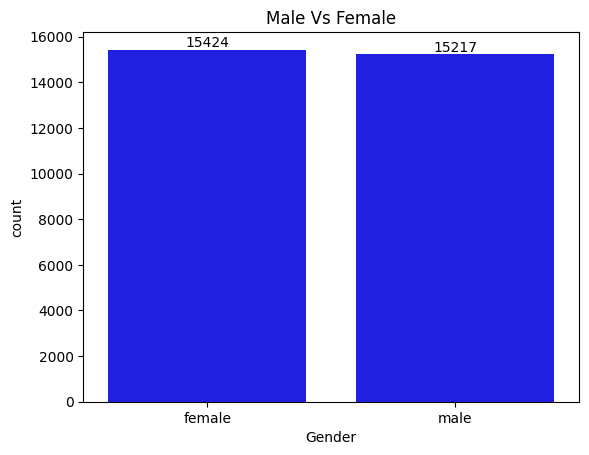

In [ ]:
ax = sns.countplot(data = df, x='Gender',color="blue")
ax.bar_label(ax.containers[0])
plt.title("Male Vs Female")
plt.show()

In [ ]:
result_male_female = df.groupby(df['Gender'])[['MathScore','ReadingScore','WritingScore']].mean()
print(result_male_female)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


# Gender

1.   From the above graph we can see that number of females are more as compair to number of males
2.   Score wise girls performed better that boys in ReadingScore andwritingScore, whereas boys scored better in MathScore.



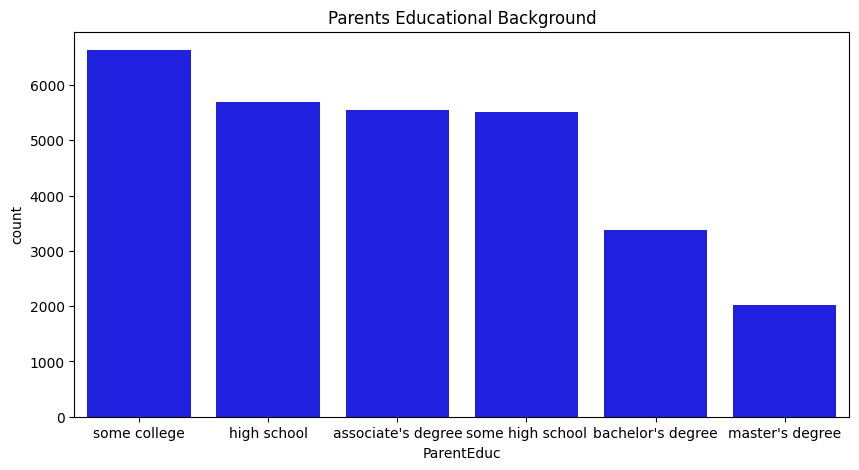

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ParentEduc', order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"], color='blue')
plt.title("Parents Educational Background")
plt.show()

In [ ]:
parent_base_result = df.groupby(df['ParentEduc'])[['MathScore','ReadingScore','WritingScore']].mean()
print(parent_base_result)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


# Parents Educational background


1.   There are six categories of educational background of parent(s) of the students, ranging from master's education (the highest level)


2.   Those with some high school education consistently achieve the lowest scores.




3.  When it comes to the students' test scores, there seems to be a clear correlation with their parents(s) educational background. Children of highly educated parents score better than the children of less educated parents. This pattern is seen consistently with all three test subjects.



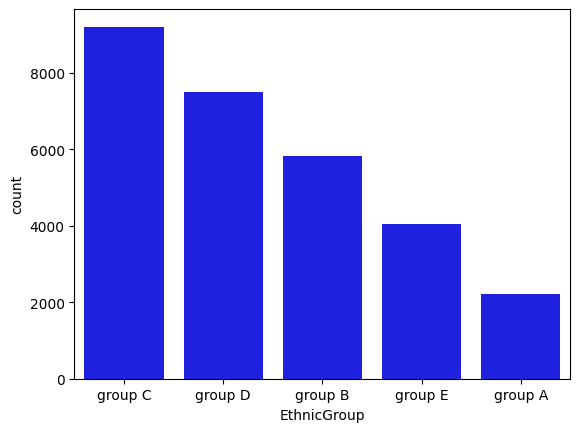

In [ ]:
sns.countplot(data = df, x='EthnicGroup', order=['group C', 'group D', 'group B', 'group E', 'group A'],color='blue')
plt.show()

In [ ]:
result_ethnic = df.groupby(df['EthnicGroup'])[['MathScore','ReadingScore','WritingScore']].mean()
result_ethnic

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.695723,68.438233,66.999240
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


# Ethnic Group


1.   mostly students belongs group C
2.   best students gets score belong group E



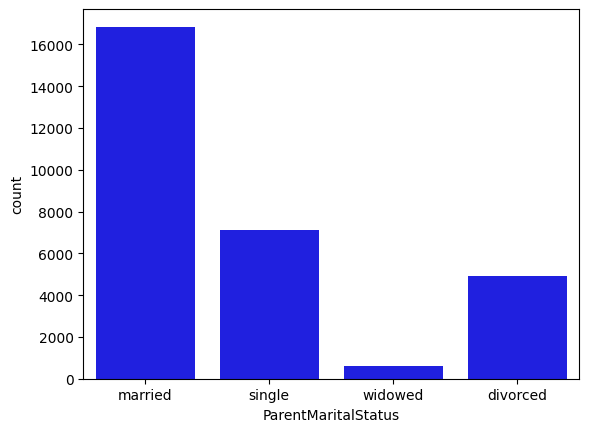

In [ ]:
sns.countplot(data=df,x='ParentMaritalStatus',color='blue')
plt.show()

<Axes: xlabel='ParentMaritalStatus'>

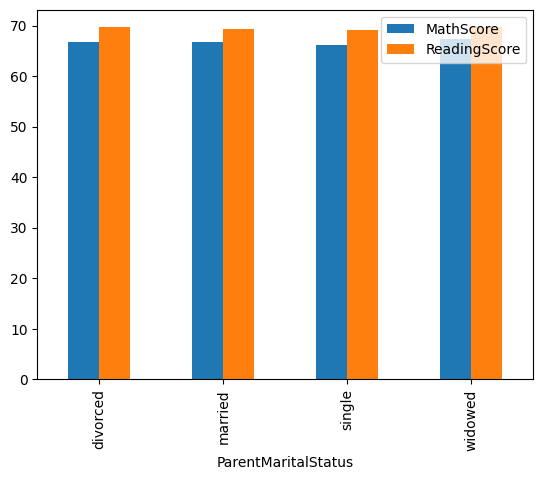

In [ ]:
df.groupby('ParentMaritalStatus')[['MathScore', 'ReadingScore']].mean().plot(kind='bar')

In [ ]:
result_parentsM = df.groupby(df['ParentMaritalStatus'])[['MathScore','ReadingScore','WritingScore']].mean()
result_parentsM

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


# Parents Marital Status


1. mostly parents are married and very min parents belongs widowed

2.   But marital status no effect education



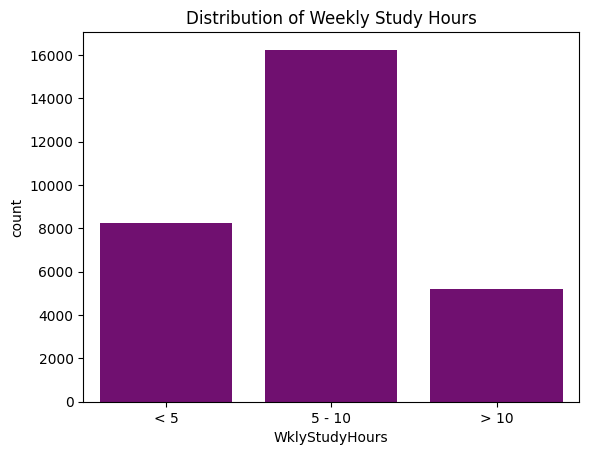

In [ ]:
sns.countplot(data=df, x='WklyStudyHours',color='purple')
plt.title('Distribution of Weekly Study Hours')
plt.show()


In [ ]:
result_WklyStudyHours = df.groupby(df['WklyStudyHours'])[['MathScore','ReadingScore','WritingScore']].mean()
result_WklyStudyHours

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


# Weekly Study Hours


*   here we can weekly hours no impact of study hours on students result.





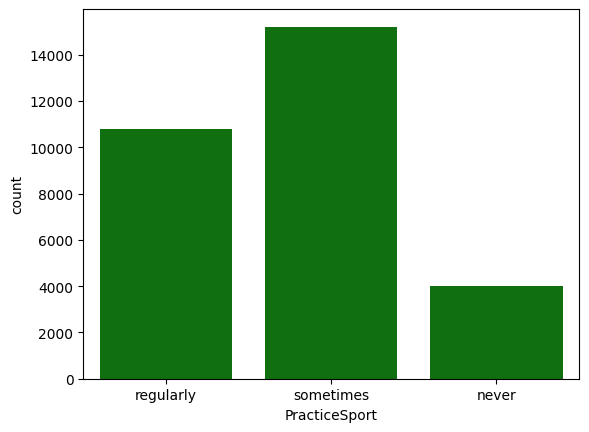

In [ ]:
sns.countplot(data=df,x='PracticeSport',color='green')
plt.show()

In [ ]:
result_PracticeSport = df.groupby(df['PracticeSport'])[['MathScore','ReadingScore','WritingScore']].mean()
result_PracticeSport

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


# PracticeSport


*   some Impact student result but everyone not fail



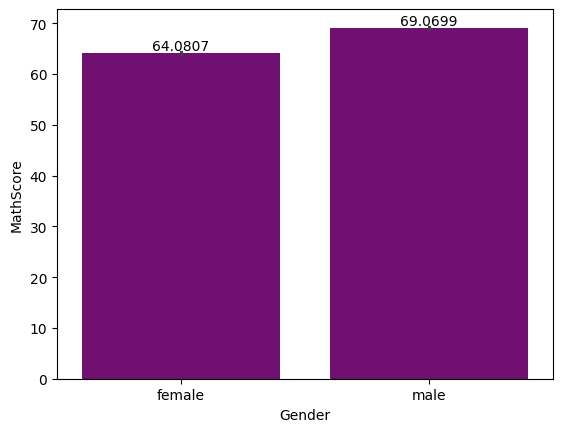

In [ ]:
ax = sns.barplot(data=df,x='Gender',y='MathScore',color='purple')
ax.bar_label(ax.containers[0])
plt.show()

**From the above bar graph we can see that highest marks in maths scored by male**

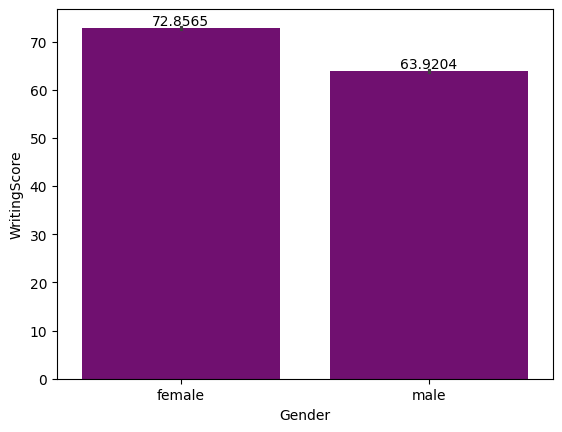

In [ ]:
ax = sns.barplot(data=df,x='Gender',y='WritingScore',color='purple')
ax.bar_label(ax.containers[0])
plt.show()

**From the above bar graph we can see that highest marks in writing scored by female**

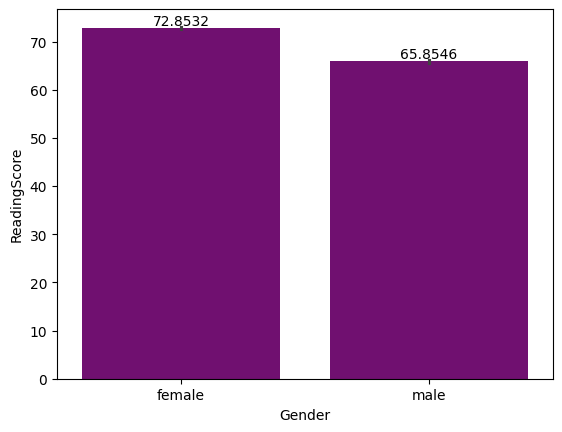

In [ ]:
ax = sns.barplot(data=df,x='Gender',y='ReadingScore',color='purple')
ax.bar_label(ax.containers[0])
plt.show()

**From the above bar graph we can see that highest marks in reading scored by female**

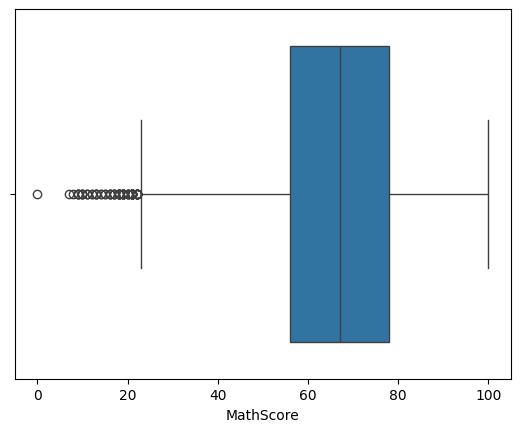

In [ ]:
sns.boxplot(data=df, x='MathScore')
plt.show()

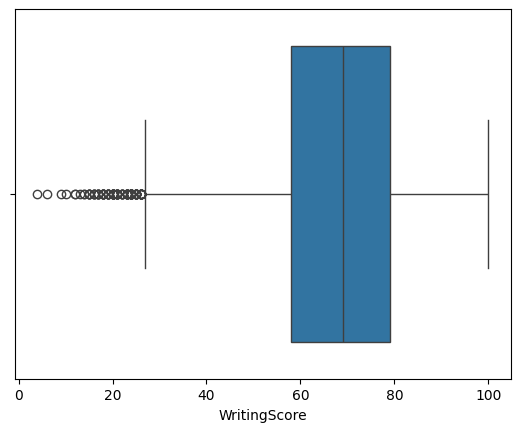

In [ ]:
sns.boxplot(data=df, x='WritingScore')
plt.show()

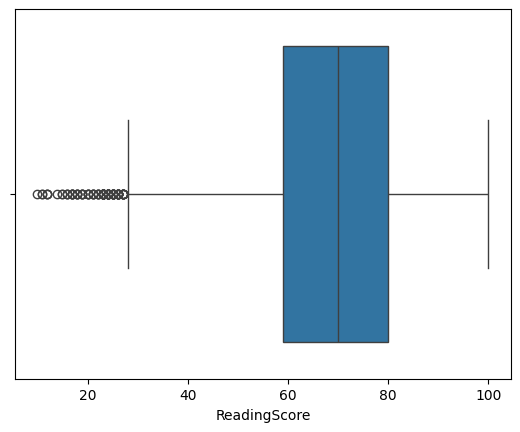

In [ ]:
sns.boxplot(data=df, x='ReadingScore')
plt.show()

# Feature Engineering

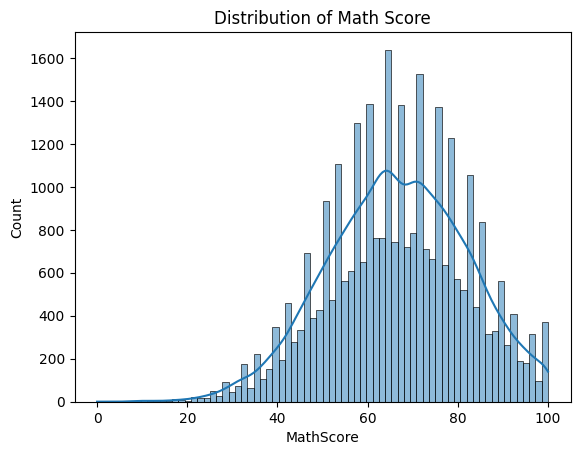

In [ ]:
sns.histplot(df['MathScore'], kde=True)
plt.title('Distribution of Math Score')
plt.show()

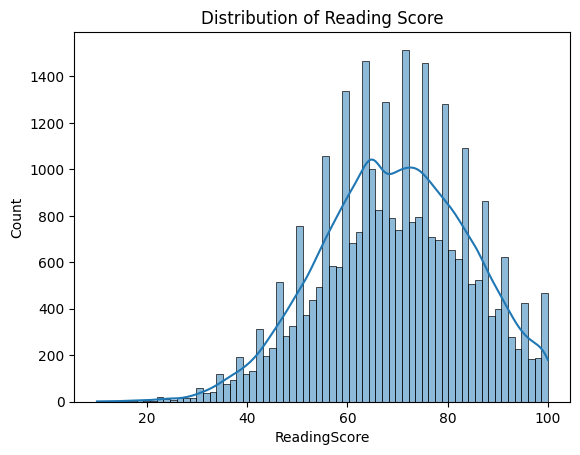

In [ ]:
sns.histplot(df['ReadingScore'], kde=True)
plt.title('Distribution of Reading Score')
plt.show()

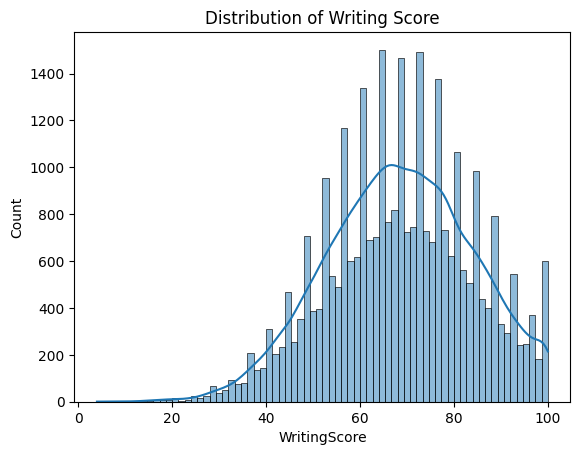

In [ ]:
sns.histplot(df['WritingScore'], kde=True)
plt.title('Distribution of Writing Score')
plt.show()

# handling missing values

In [ ]:
df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0], inplace=True)
df['ParentEduc'].fillna(df['ParentEduc'].mode()[0], inplace=True)
df['TestPrep'].fillna(df['TestPrep'].mode()[0], inplace=True)
df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0], inplace=True)
df['PracticeSport'].fillna(df['PracticeSport'].mode()[0], inplace=True)
df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0], inplace=True)
df['NrSiblings'].fillna(df['NrSiblings'].median(), inplace=True)
df['TransportMeans'].fillna(df['TransportMeans'].mode()[0], inplace=True)
df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0], inplace=True)


# data preprocessing

In [ ]:
res = df.copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
            'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

enc = OrdinalEncoder()
res[cat_cols] = enc.fit_transform(res[cat_cols])

In [ ]:
res.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,71,71,74
1,0.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,87,93,91
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,45,56,42
4,1.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,76,78,75


# Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

X = res.drop(['MathScore', 'ReadingScore', 'WritingScore'],axis=1)
y = res[['MathScore', 'ReadingScore', 'WritingScore']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

# Evaluate the Model:

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score,accuracy_score
y_pred = le.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"- Mean Absolute Error: {mae}")

R2 Score: 0.23738989669865795
Mean Squared Error: 174.59940723943384
- Mean Absolute Error: 10.706793709207922


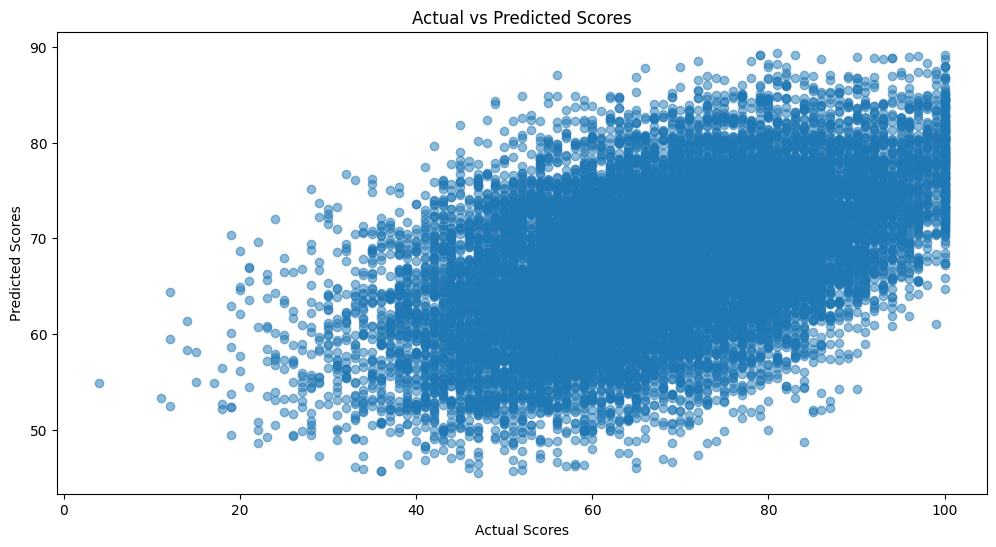

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title(f"Actual vs Predicted Scores")
plt.show()